In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [46]:
import pickle

In [47]:
with open('df_cic_train50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [12]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 78)
X teste =  (424610, 78)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [13]:
#X_train50_train.head()
X_train50_train

array([[4.46063490e-04, 5.03883405e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.32194632e-01, 2.50000035e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.46063490e-04, 1.43333354e-06, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00754591e-01, 2.83741707e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.17783064e-04, 1.15833350e-06, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.01821426e-04, 7.09192300e-01, 2.73027603e-05, ...,
        0.00000000e+00, 7.08333333e-01, 7.08333333e-01]])

In [14]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1008718    BENIGN
1092907    BENIGN
1034897    BENIGN
727692     BENIGN
1200733    BENIGN
            ...  
259178     BENIGN
1414414    BENIGN
131932     BENIGN
671155     BENIGN
121958        DoS
Name: Label_multiclass, Length: 990755, dtype: object
1008718    0
1092907    0
1034897    0
727692     0
1200733    0
          ..
259178     0
1414414    0
131932     0
671155     0
121958     1
Name: Label_binary, Length: 990755, dtype: int64


In [15]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [17]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [48]:
with open('df_cic_test50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [19]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 78)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [20]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [21]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [22]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [25]:
#X_test50.head()
X_test50

array([[5.01821426e-04, 3.38626715e-03, 9.10092010e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.46063490e-04, 5.08433405e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.44970634e-03, 2.58366703e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.46063490e-04, 5.45183411e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.05560925e-01, 3.05008377e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.22652591e-02, 4.91666736e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [26]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'PortScan']
[0 0 0 ... 0 0 1]


# Algoritmo kNN para Train e Validation - Train50

In [49]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [50]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [51]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9991121264218931

### Visualização da árvore binária

In [26]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [27]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [28]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [29]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [52]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [53]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [33]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [34]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [35]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9990438284543464

### Visualização da árvore multiclasse

In [36]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [37]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [38]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [39]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [40]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999317  0.999578  0.999447    340989
           1   0.998276  0.997214  0.997745     83621

    accuracy                       0.999112    424610
   macro avg   0.998796  0.998396  0.998596    424610
weighted avg   0.999112  0.999112  0.999112    424610



In [41]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.999314  0.999578  0.999446    340989
      BotNet   0.926923  0.772436  0.842657       312
  BruteForce   1.000000  0.996656  0.998325      2093
        DDoS   0.998332  0.998748  0.998540     19171
         DoS   0.997196  0.996247  0.996721     37836
  Heartbleed   1.000000  1.000000  1.000000         1
Infiltration   1.000000  0.200000  0.333333         5
    PortScan   0.999874  0.999791  0.999833     23885
   WebAttack   0.962617  0.971698  0.967136       318

    accuracy                       0.999044    424610
   macro avg   0.987140  0.881684  0.903999    424610
weighted avg   0.999035  0.999044  0.999031    424610



### Cross Validation do train50

In [42]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [43]:
score_cv_train50_binary

array([0.99914207, 0.99932375, 0.99924301, 0.99915217, 0.99923291,
       0.99914206, 0.99912188, 0.99926318, 0.99918244, 0.99912188])

In [44]:
cv_result_train50_binary

[0.999192534853487]

In [10]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [11]:
score_cv_train50_multiclass

array([0.99905123, 0.99920263, 0.99914207, 0.99906133, 0.9991017 ,
       0.99907141, 0.99905122, 0.99916225, 0.99912188, 0.99905122])

In [12]:
cv_result_train50_multiclass

[0.9991016951209035]

### Matriz de Confusão do train50

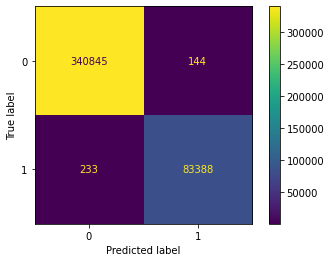

In [13]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

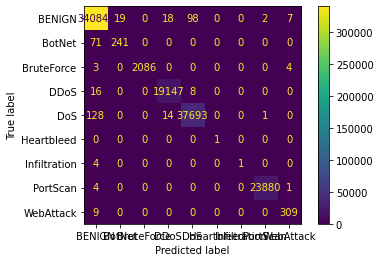

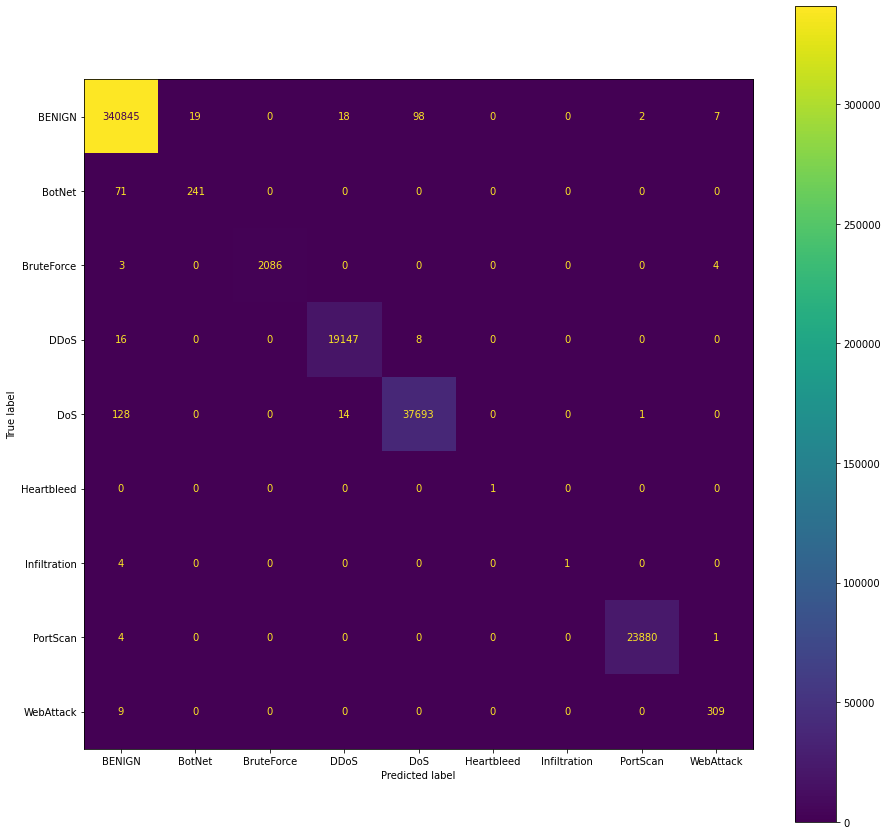

In [66]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [54]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [55]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [56]:
y_test50_binary

0          0
1          0
2          0
3          1
4          0
          ..
1415360    1
1415361    0
1415362    0
1415363    0
1415364    1
Name: Label_binary, Length: 1415365, dtype: int64

In [57]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9993514040547845

### Predição test50 multiclasse

In [58]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [59]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [60]:
y_test50_multiclass

0            BENIGN
1            BENIGN
2            BENIGN
3               DoS
4            BENIGN
             ...   
1415360        DDoS
1415361      BENIGN
1415362      BENIGN
1415363      BENIGN
1415364    PortScan
Name: Label_multiclass, Length: 1415365, dtype: object

In [61]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9992920554062027

### Precision e Recall do test50

In [62]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999495  0.999697  0.999596   1136548
           1   0.998765  0.997941  0.998353    278817

    accuracy                       0.999351   1415365
   macro avg   0.999130  0.998819  0.998975   1415365
weighted avg   0.999351  0.999351  0.999351   1415365



In [63]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.999494  0.999697  0.999596   1136548
      BotNet   0.948174  0.819756  0.879301       982
  BruteForce   0.999855  0.997542  0.998697      6917
        DDoS   0.998797  0.999016  0.998907     64013
         DoS   0.997830  0.997285  0.997557    126330
  Heartbleed   1.000000  0.800000  0.888889         5
Infiltration   1.000000  0.235294  0.380952        17
    PortScan   0.999899  0.999736  0.999818     79464
   WebAttack   0.978880  0.978880  0.978880      1089

    accuracy                       0.999292   1415365
   macro avg   0.991437  0.869689  0.902511   1415365
weighted avg   0.999287  0.999292  0.999283   1415365



### Matriz de Confusão do test50

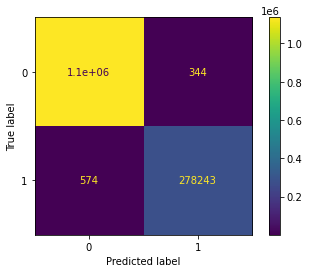

In [64]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

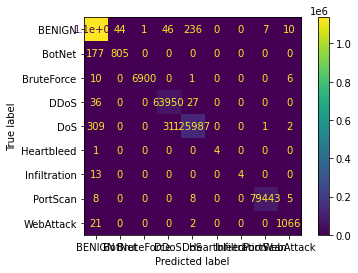

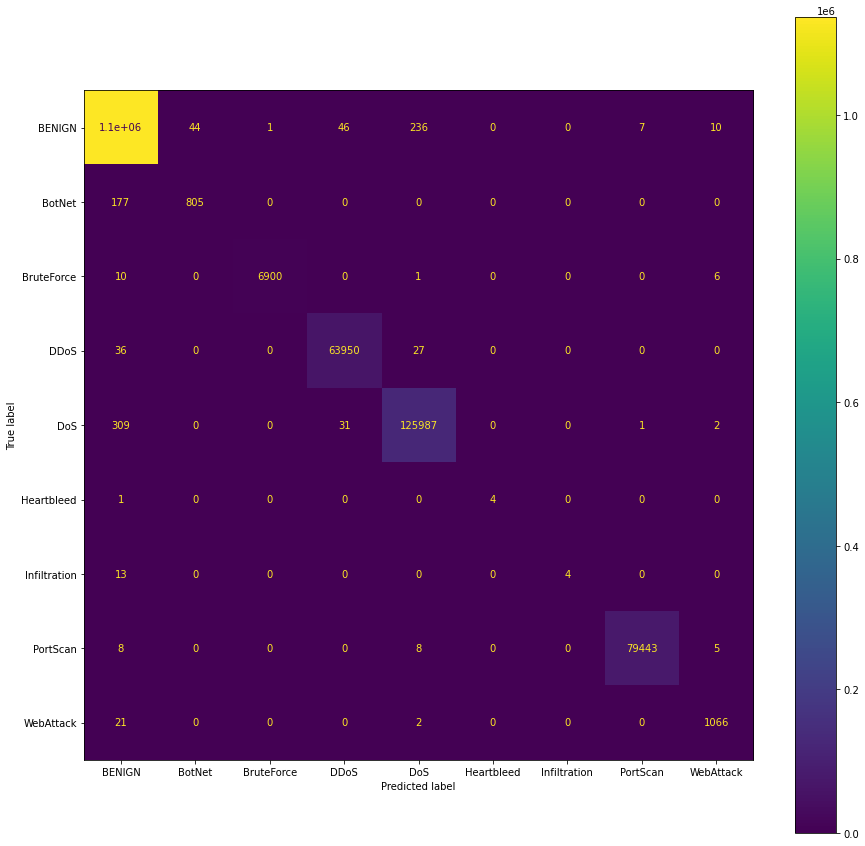

In [65]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)